<a href="https://colab.research.google.com/github/LucianoLarrea/LucianoLarrea/blob/main/01_Regresion_Redes_Neuronales_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduccion a regresion con redes neuronales en TensoFlow
1-Predecir un numero

In [2]:
#Importar Tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


Crear datos para revisar y ajustar

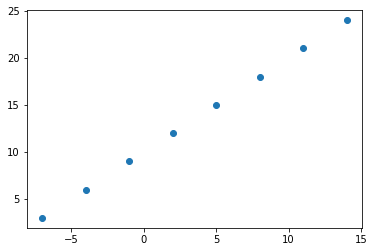

In [23]:
import numpy as np
import matplotlib.pyplot as plt
#Crear Features
X = np.array([-7,-4,-1,2,5,8,11,14])
y = np.array([3,6,9,12,15,18,21,24])
plt.scatter(X,y)

In [4]:
y == X +10 #Esta es la relacion que quiero predecir


array([ True,  True,  True,  True,  True,  True,  True,  True])

Formas de Entrada y Salida

In [5]:
info_casa = tf.constant(["habitacion","banio","cochera"])
precio_casa = tf.constant([939700])
info_casa,precio_casa

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'habitacion', b'banio', b'cochera'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [26]:
#Convertir NumPy Arrays en Tensors con dtype = type32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X = tf.expand_dims(X, axis=0)
y = tf.expand_dims(y, axis=0)
X,y,X.ndim

(<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]], dtype=float32)>,
 2)

Pasos para el modelado en TensorFlow
1-**Crear un modelo**: definir las capas de entrada y salida, y las capas ocultas.
2-**Compilar un modelo**: definir la fucion loss (que dice que tan mal esta nuestro modelo), la funcion optimizer (como mejorar los patrones de aprendizaje) y metricas de evaluacion (para interpretar la performance de nuestro modelo).
3-**Ajustar el modelo**: dejar al modelo intentar encontrar patrones entre X e y. 

Opcionalmente, la primer capa puede recibir un argumento "input shape":
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
Luego hacemos automatic shape interference
model.add(tf.keras.layers.Dense(4)

In [27]:
#Definir un Seed aleatorio
tf.random.set_seed(42)
#1 Crear un modelo usando un API secuencial
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
#2 Compilar el modelo
model.compile(loss = tf.keras.losses.mae,#mae es la Media del Error Abosluto)
              optimizer = tf.keras.optimizers.SGD(),#Stochastic Gradient Descent
              metrics = ["mae"])
#3 Ajustar el modelo
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 279ms/step - loss: 6.4847 - mae: 6.4847
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 6.1865 - mae: 6.1865
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 6.0000 - mae: 6.0000
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 6.0000 - mae: 6.0000
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 6.0000 - mae: 6.0000


In [28]:
#Hacer una prediccion usando nuestro modelo
model.predict([17.])

ValueError: ignored